In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

In [2]:
trayectorias = 10000
puntos = 365
delta_t = 1/puntos
t = np.linspace(0,1,puntos+1)

**Movimiento Browniano Estandar**

In [3]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

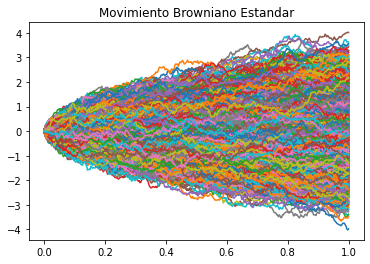

In [4]:
mb = MBEU(trayectorias,puntos)
for i in range(len(mb)):
  plt.plot(t, mb[i, :])
plt.title('Movimiento Browniano Estandar')
plt.show()

$\textbf{Ruido Gaussiano Blanco y Coloreado}$

In [22]:
def WHITE_COLOR(numTrayectorias, numPuntos, h):
  mb = MBEU(numTrayectorias, numPuntos+h)
  wc = np.zeros((numTrayectorias, numPuntos+h+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      wc[i,j] = (mb[i,j+h]-mb[i,j])/h
  return wc

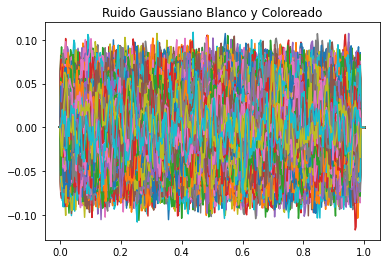

In [23]:
h = 5
wc = WHITE_COLOR(trayectorias, puntos, h)
t_wc = np.linspace(0,1,puntos+h+1)
for i in range(len(wc)):
  plt.plot(t_wc, wc[i, :])
plt.title('Ruido Gaussiano Blanco y Coloreado')
plt.show()

1.   (a) La medida de centralidad (valor esperado) de dispersión (varianza) y de dispersión conjunta (covarianza). Para ello compare cada una de las propiedades estadísticas teóricas solicitadas con las empíricas.
2.   (b) Si son o no procesos Gaussianos.
3.   (c) Si son o no Movimientos Brownianos Estándar.

Media teorica = 0 Media simulada = -7.305399909004857e-05
Varianza teorica = 0.2 Varianza simulada = 0.19680612238439105
Covarianza teorica = 0.008109589041095891 Covarianza simulada = -9.409327474214776e-06


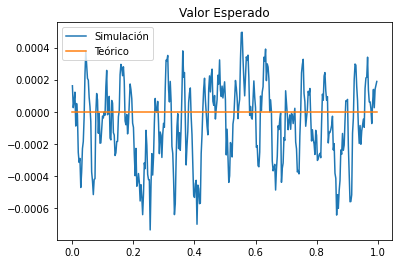

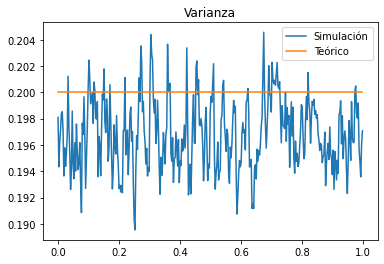

In [24]:
medias_e_wc = [] # Media experimental del Ruido Gaussiano Blanco y Coloreado
varianzas_e_wc = [] # Varianza experimental del Ruido Gaussiano Blanco y Coloreado

for i in range(1, puntos+1):
  medias_e_wc.append(np.mean(wc[:, i]))
  varianzas_e_wc.append((np.var(wc[:, i]))*puntos)

t_rand = random.randrange(1, puntos + 1)
s_rand = random.randrange(1, puntos + 1)

covarianza_wc = np.cov(wc[:,t_rand-1], wc[:, s_rand-1])
covarianza_e_wc = covarianza_wc[0][1]
covarianza_t_wc = ((s_rand*delta_t + h*delta_t)-np.minimum((s_rand+h)*delta_t, t_rand*delta_t))/h**2

print('Media teorica = 0 Media simulada =', np.mean(medias_e_wc))
print('Varianza teorica =', 1/h, "Varianza simulada =",np.mean(varianzas_e_wc))
print('Covarianza teorica =', covarianza_t_wc,'Covarianza simulada =', covarianza_e_wc)

aux_wc = [0]*len(medias_e_wc)
fig5 = plt.figure()
t_aux_wc = list(np.arange(0,1, delta_t))
plt.plot(t_aux_wc, medias_e_wc, label="Simulación")
plt.plot(t_aux_wc, aux_wc,label='Teórico')
plt.legend()
plt.title("Valor Esperado")
plt.show()

aux_wc_v = [1/h]*len(varianzas_e_wc)
fig6 = plt.figure()
plt.plot(t_aux_wc, varianzas_e_wc, label="Simulación")
plt.plot(t_aux_wc, aux_wc_v, label='Teórico')
plt.legend()
plt.title("Varianza")
plt.show()

>Como podemos evidenciar el valor esperado, la varianza y la covarianza se ajustan de manera adecuada a las teóricas.

¿Es un proceso Gaussiano?

In [26]:
normalidad=0
for i in range(puntos+1):
  stat, prob= st.jarque_bera(wc[:,i])
  if prob>0.05:
    normalidad+=1
print('Porcentaje de instantes de tiempo normales',normalidad*100/puntos)

Porcentaje de instantes de tiempo normales 96.16438356164383


>En este caso podemos concluir que si es un proceso Gaussiano, pues más del 96.16% de los instantes de tiempo son normales.

¿Es un Movimiento Browniano Estandar?

In [27]:
t_aux_wc = random.randrange(1,puntos+1)
Wt = wc[:, t_aux_wc]
print('Varianza experimental:', np.var(Wt), ', Varianza teorica', t_aux_wc*delta_t)

Varianza experimental: 0.0005425843431971132 , Varianza teorica 0.8493150684931506


>**Var(Bt)** es claramente diferente de **t**, por lo tanto el Ruido Gaussiano Blanco y Coloreado no es un MBE.
